# Imports y configuraciones iniciales

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from bwb.distributions import DistributionDraw, DistributionDrawBuilder
from bwb.utils import plot_list_of_draws, plot_histogram_from_points

Importamos los datos utilizando el archivo npy que proporciona Google Cloud.

In [2]:
data = np.load(r"..\data\face.npy")
data.shape

(161666, 784)

Hacemos una lista de caritas, fijando un generador con la semilla 42 para tener resultados replicables.

In [3]:
rng = np.random.default_rng(42)
faces: list[DistributionDraw] = list()
n_faces = len(data)

# Builder con la semilla por default
dist_draw_builder = DistributionDrawBuilder(seed=rng)

for i in range(n_faces):
    arr = 255 - data[i, :].reshape(28, 28)
    dd_arr = dist_draw_builder.create_fromarray(arr)
    faces.append(dd_arr)

Observamos las distintas caritas que tiene el dataset.

In [4]:
plot_list_of_draws(faces)

Muestrear con respecto a una carita (la primera para simplificar) para obtener $D = \{x_i\}_{i=1}^{n}\subseteq\mathcal{X}^n$

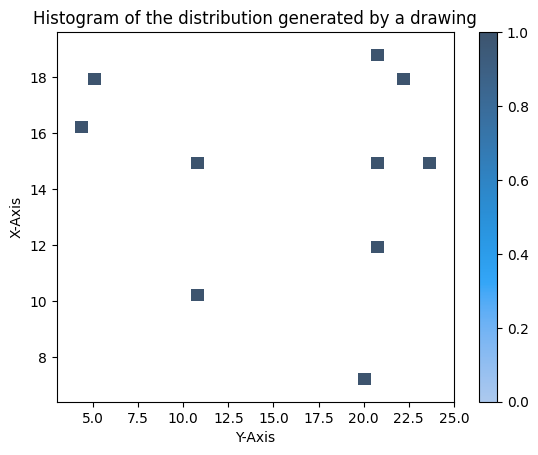

In [21]:
n = 10

first_face = DistributionDraw.fromarray(255 - data[0, :].reshape(28, 28),
                                        seed=42)

x = first_face.rvs(size=n)

plot_histogram_from_points(x, histplot_kwargs=dict(bins=28))
plt.show()

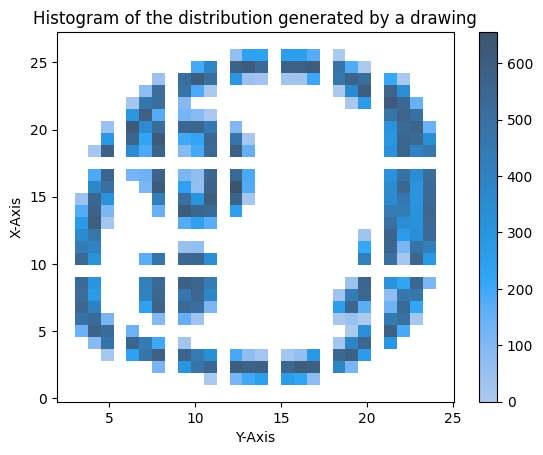

In [22]:
plot_histogram_from_points(first_face.rvs(size=100_000), histplot_kwargs=dict(bins=28))
plt.show()

Defino
\begin{equation}
\tilde\Lambda_n(m) = \prod_{i=1}^{n} f_m(x_i)
\end{equation}

A través de la función `likelihood`

In [23]:
def likelihood(mu: DistributionDraw, data: list[tuple[int, int]]):
    evaluations = []
    for i in range(len(data)):
        evaluations.append(mu.matrix[data[i]])
    return np.prod(evaluations)

likelihood(mu=faces[0], data=x)

1.2568867068560359e-24

# Metropolis Algorithm

En esta sección se implementa el *Metropolis Algorithm*. Este posee la siguiente matriz $R$:
\begin{equation}
R_{\mu, \nu} = (\text{degr}(\mu))^{-1} = \frac{1}{|\mathcal{M} - 1|}
\end{equation}
donde lo último es por la forma que posee el grafo escogido.

In [24]:
%%time
# Calcular las distintas verosmilitudes como caché
likelihood_cache = np.array([likelihood(face, data=x) for face in faces])

valid_faces = [face for i, face in enumerate(faces) if ]

probabilities = (likelihood_cache > 0).astype(float)
probabilities /= probabilities.sum()

CPU times: total: 3.47 s
Wall time: 3.68 s


In [25]:
%%time

N = 1_000  # 10_000
mu = []

# Paso 1. Empezar con una distribución inicial mu^(0) \in M
current_face = int(rng.choice(n_faces, p=probabilities))
mu.append(faces[current_face])  # mu^(0)
visited_faces = [faces[current_face]]

# Paso 2.
for i in range(N):
    print("=" * 10)

    # Paso a. muestrear u ~ U[0, 1]
    u = rng.uniform(low=0, high=1)

    # Paso b. muestrear mu^star de acuerdo a R partiendo desde mu^(i)
    possible_faces = list(range(n_faces))
    possible_faces.remove(current_face)
    # Escoger una carita
    next_face = int(rng.choice(possible_faces))
    mu_star = faces[next_face]
    if next_face not in likelihood_cache: likelihood_cache[next_face] = likelihood(mu_star, data=x)

    # Paso c.
    # Luego calculamos la probabilidad de aceptación
    A_mu_i_mu_star = min(1., (likelihood_cache[next_face])
                         / (likelihood_cache[current_face])
                         )

    print(f"{i = }")
    print(f"{likelihood_cache[current_face] = }")
    print(f"{A_mu_i_mu_star = }")
    if u < A_mu_i_mu_star:
        print(f"{current_face = } -> {next_face = }")
        print(f"{u = }")

        mu.append(mu_star)
        # Moverse a la siguiente carita
        current_face = next_face
        visited_faces.append(mu_star)

    else:
        mu.append(mu[i])


i = 0
likelihood_cache[current_face] = 8.740286145552812e-30
A_mu_i_mu_star = 0.0
i = 1
likelihood_cache[current_face] = 8.740286145552812e-30
A_mu_i_mu_star = 0.0
i = 2
likelihood_cache[current_face] = 8.740286145552812e-30
A_mu_i_mu_star = 0.0
i = 3
likelihood_cache[current_face] = 8.740286145552812e-30
A_mu_i_mu_star = 0.0
i = 4
likelihood_cache[current_face] = 8.740286145552812e-30
A_mu_i_mu_star = 0.0
i = 5
likelihood_cache[current_face] = 8.740286145552812e-30
A_mu_i_mu_star = 0.0
i = 6
likelihood_cache[current_face] = 8.740286145552812e-30
A_mu_i_mu_star = 0.0
i = 7
likelihood_cache[current_face] = 8.740286145552812e-30
A_mu_i_mu_star = 0.0
i = 8
likelihood_cache[current_face] = 8.740286145552812e-30
A_mu_i_mu_star = 0.0
i = 9
likelihood_cache[current_face] = 8.740286145552812e-30
A_mu_i_mu_star = 0.0
i = 10
likelihood_cache[current_face] = 8.740286145552812e-30
A_mu_i_mu_star = 1.0
current_face = 73 -> next_face = 27834
u = 0.5433514174237577
i = 11
likelihood_cache[current_fac

i = 89
likelihood_cache[current_face] = 1.5553976803654937e-23
A_mu_i_mu_star = 0.0
i = 90
likelihood_cache[current_face] = 1.5553976803654937e-23
A_mu_i_mu_star = 0.0
i = 91
likelihood_cache[current_face] = 1.5553976803654937e-23
A_mu_i_mu_star = 0.0
i = 92
likelihood_cache[current_face] = 1.5553976803654937e-23
A_mu_i_mu_star = 0.0
i = 93
likelihood_cache[current_face] = 1.5553976803654937e-23
A_mu_i_mu_star = 0.0
i = 94
likelihood_cache[current_face] = 1.5553976803654937e-23
A_mu_i_mu_star = 0.0
i = 95
likelihood_cache[current_face] = 1.5553976803654937e-23
A_mu_i_mu_star = 0.0
i = 96
likelihood_cache[current_face] = 1.5553976803654937e-23
A_mu_i_mu_star = 0.0
i = 97
likelihood_cache[current_face] = 1.5553976803654937e-23
A_mu_i_mu_star = 0.0
i = 98
likelihood_cache[current_face] = 1.5553976803654937e-23
A_mu_i_mu_star = 0.0
i = 99
likelihood_cache[current_face] = 1.5553976803654937e-23
A_mu_i_mu_star = 0.0
i = 100
likelihood_cache[current_face] = 1.5553976803654937e-23
A_mu_i_mu_st

i = 182
likelihood_cache[current_face] = 1.5553976803654937e-23
A_mu_i_mu_star = 0.0
i = 183
likelihood_cache[current_face] = 1.5553976803654937e-23
A_mu_i_mu_star = 0.0
i = 184
likelihood_cache[current_face] = 1.5553976803654937e-23
A_mu_i_mu_star = 0.0
i = 185
likelihood_cache[current_face] = 1.5553976803654937e-23
A_mu_i_mu_star = 0.0
i = 186
likelihood_cache[current_face] = 1.5553976803654937e-23
A_mu_i_mu_star = 0.0
i = 187
likelihood_cache[current_face] = 1.5553976803654937e-23
A_mu_i_mu_star = 0.0
i = 188
likelihood_cache[current_face] = 1.5553976803654937e-23
A_mu_i_mu_star = 0.0
i = 189
likelihood_cache[current_face] = 1.5553976803654937e-23
A_mu_i_mu_star = 0.0
i = 190
likelihood_cache[current_face] = 1.5553976803654937e-23
A_mu_i_mu_star = 0.0
i = 191
likelihood_cache[current_face] = 1.5553976803654937e-23
A_mu_i_mu_star = 0.0
i = 192
likelihood_cache[current_face] = 1.5553976803654937e-23
A_mu_i_mu_star = 0.0
i = 193
likelihood_cache[current_face] = 1.5553976803654937e-23
A

i = 271
likelihood_cache[current_face] = 1.5553976803654937e-23
A_mu_i_mu_star = 0.0
i = 272
likelihood_cache[current_face] = 1.5553976803654937e-23
A_mu_i_mu_star = 0.0
i = 273
likelihood_cache[current_face] = 1.5553976803654937e-23
A_mu_i_mu_star = 0.0
i = 274
likelihood_cache[current_face] = 1.5553976803654937e-23
A_mu_i_mu_star = 0.0
i = 275
likelihood_cache[current_face] = 1.5553976803654937e-23
A_mu_i_mu_star = 0.0
i = 276
likelihood_cache[current_face] = 1.5553976803654937e-23
A_mu_i_mu_star = 0.0
i = 277
likelihood_cache[current_face] = 1.5553976803654937e-23
A_mu_i_mu_star = 0.0
i = 278
likelihood_cache[current_face] = 1.5553976803654937e-23
A_mu_i_mu_star = 0.0
i = 279
likelihood_cache[current_face] = 1.5553976803654937e-23
A_mu_i_mu_star = 0.0
i = 280
likelihood_cache[current_face] = 1.5553976803654937e-23
A_mu_i_mu_star = 0.0
i = 281
likelihood_cache[current_face] = 1.5553976803654937e-23
A_mu_i_mu_star = 0.0
i = 282
likelihood_cache[current_face] = 1.5553976803654937e-23
A

i = 356
likelihood_cache[current_face] = 5.212644595513751e-24
A_mu_i_mu_star = 0.0
i = 357
likelihood_cache[current_face] = 5.212644595513751e-24
A_mu_i_mu_star = 0.0
i = 358
likelihood_cache[current_face] = 5.212644595513751e-24
A_mu_i_mu_star = 0.0
i = 359
likelihood_cache[current_face] = 5.212644595513751e-24
A_mu_i_mu_star = 0.0
i = 360
likelihood_cache[current_face] = 5.212644595513751e-24
A_mu_i_mu_star = 0.0
i = 361
likelihood_cache[current_face] = 5.212644595513751e-24
A_mu_i_mu_star = 0.0
i = 362
likelihood_cache[current_face] = 5.212644595513751e-24
A_mu_i_mu_star = 0.0
i = 363
likelihood_cache[current_face] = 5.212644595513751e-24
A_mu_i_mu_star = 0.0
i = 364
likelihood_cache[current_face] = 5.212644595513751e-24
A_mu_i_mu_star = 0.0
i = 365
likelihood_cache[current_face] = 5.212644595513751e-24
A_mu_i_mu_star = 0.0
i = 366
likelihood_cache[current_face] = 5.212644595513751e-24
A_mu_i_mu_star = 0.0
i = 367
likelihood_cache[current_face] = 5.212644595513751e-24
A_mu_i_mu_sta

i = 448
likelihood_cache[current_face] = 5.212644595513751e-24
A_mu_i_mu_star = 0.0
i = 449
likelihood_cache[current_face] = 5.212644595513751e-24
A_mu_i_mu_star = 0.0
i = 450
likelihood_cache[current_face] = 5.212644595513751e-24
A_mu_i_mu_star = 0.0
i = 451
likelihood_cache[current_face] = 5.212644595513751e-24
A_mu_i_mu_star = 0.0
i = 452
likelihood_cache[current_face] = 5.212644595513751e-24
A_mu_i_mu_star = 0.0
i = 453
likelihood_cache[current_face] = 5.212644595513751e-24
A_mu_i_mu_star = 0.0
i = 454
likelihood_cache[current_face] = 5.212644595513751e-24
A_mu_i_mu_star = 0.0
i = 455
likelihood_cache[current_face] = 5.212644595513751e-24
A_mu_i_mu_star = 0.0
i = 456
likelihood_cache[current_face] = 5.212644595513751e-24
A_mu_i_mu_star = 0.0
i = 457
likelihood_cache[current_face] = 5.212644595513751e-24
A_mu_i_mu_star = 0.0
i = 458
likelihood_cache[current_face] = 5.212644595513751e-24
A_mu_i_mu_star = 0.0
i = 459
likelihood_cache[current_face] = 5.212644595513751e-24
A_mu_i_mu_sta

i = 539
likelihood_cache[current_face] = 5.212644595513751e-24
A_mu_i_mu_star = 0.0
i = 540
likelihood_cache[current_face] = 5.212644595513751e-24
A_mu_i_mu_star = 0.0
i = 541
likelihood_cache[current_face] = 5.212644595513751e-24
A_mu_i_mu_star = 0.0
i = 542
likelihood_cache[current_face] = 5.212644595513751e-24
A_mu_i_mu_star = 0.0
i = 543
likelihood_cache[current_face] = 5.212644595513751e-24
A_mu_i_mu_star = 0.0
i = 544
likelihood_cache[current_face] = 5.212644595513751e-24
A_mu_i_mu_star = 0.0
i = 545
likelihood_cache[current_face] = 5.212644595513751e-24
A_mu_i_mu_star = 0.0
i = 546
likelihood_cache[current_face] = 5.212644595513751e-24
A_mu_i_mu_star = 0.0
i = 547
likelihood_cache[current_face] = 5.212644595513751e-24
A_mu_i_mu_star = 0.0
i = 548
likelihood_cache[current_face] = 5.212644595513751e-24
A_mu_i_mu_star = 0.0
i = 549
likelihood_cache[current_face] = 5.212644595513751e-24
A_mu_i_mu_star = 0.08622517329857157
current_face = 158473 -> next_face = 2888
u = 0.058801057823

i = 630
likelihood_cache[current_face] = 4.494611835920357e-25
A_mu_i_mu_star = 0.0
i = 631
likelihood_cache[current_face] = 4.494611835920357e-25
A_mu_i_mu_star = 0.0
i = 632
likelihood_cache[current_face] = 4.494611835920357e-25
A_mu_i_mu_star = 0.0
i = 633
likelihood_cache[current_face] = 4.494611835920357e-25
A_mu_i_mu_star = 0.0
i = 634
likelihood_cache[current_face] = 4.494611835920357e-25
A_mu_i_mu_star = 0.0
i = 635
likelihood_cache[current_face] = 4.494611835920357e-25
A_mu_i_mu_star = 0.0
i = 636
likelihood_cache[current_face] = 4.494611835920357e-25
A_mu_i_mu_star = 0.0
i = 637
likelihood_cache[current_face] = 4.494611835920357e-25
A_mu_i_mu_star = 0.0
i = 638
likelihood_cache[current_face] = 4.494611835920357e-25
A_mu_i_mu_star = 1.0
current_face = 2888 -> next_face = 133294
u = 0.42091169947061546
i = 639
likelihood_cache[current_face] = 8.223500228632242e-24
A_mu_i_mu_star = 0.0005206784114128124
i = 640
likelihood_cache[current_face] = 8.223500228632242e-24
A_mu_i_mu_sta

i = 727
likelihood_cache[current_face] = 8.223500228632242e-24
A_mu_i_mu_star = 0.0
i = 728
likelihood_cache[current_face] = 8.223500228632242e-24
A_mu_i_mu_star = 0.0
i = 729
likelihood_cache[current_face] = 8.223500228632242e-24
A_mu_i_mu_star = 0.0
i = 730
likelihood_cache[current_face] = 8.223500228632242e-24
A_mu_i_mu_star = 0.0
i = 731
likelihood_cache[current_face] = 8.223500228632242e-24
A_mu_i_mu_star = 0.0
i = 732
likelihood_cache[current_face] = 8.223500228632242e-24
A_mu_i_mu_star = 0.0
i = 733
likelihood_cache[current_face] = 8.223500228632242e-24
A_mu_i_mu_star = 0.0
i = 734
likelihood_cache[current_face] = 8.223500228632242e-24
A_mu_i_mu_star = 0.0
i = 735
likelihood_cache[current_face] = 8.223500228632242e-24
A_mu_i_mu_star = 0.0
i = 736
likelihood_cache[current_face] = 8.223500228632242e-24
A_mu_i_mu_star = 0.0
i = 737
likelihood_cache[current_face] = 8.223500228632242e-24
A_mu_i_mu_star = 0.0
i = 738
likelihood_cache[current_face] = 8.223500228632242e-24
A_mu_i_mu_sta

i = 817
likelihood_cache[current_face] = 8.223500228632242e-24
A_mu_i_mu_star = 0.0
i = 818
likelihood_cache[current_face] = 8.223500228632242e-24
A_mu_i_mu_star = 0.0
i = 819
likelihood_cache[current_face] = 8.223500228632242e-24
A_mu_i_mu_star = 0.0
i = 820
likelihood_cache[current_face] = 8.223500228632242e-24
A_mu_i_mu_star = 0.0
i = 821
likelihood_cache[current_face] = 8.223500228632242e-24
A_mu_i_mu_star = 0.0
i = 822
likelihood_cache[current_face] = 8.223500228632242e-24
A_mu_i_mu_star = 0.0
i = 823
likelihood_cache[current_face] = 8.223500228632242e-24
A_mu_i_mu_star = 0.0
i = 824
likelihood_cache[current_face] = 8.223500228632242e-24
A_mu_i_mu_star = 0.0
i = 825
likelihood_cache[current_face] = 8.223500228632242e-24
A_mu_i_mu_star = 0.0
i = 826
likelihood_cache[current_face] = 8.223500228632242e-24
A_mu_i_mu_star = 0.0
i = 827
likelihood_cache[current_face] = 8.223500228632242e-24
A_mu_i_mu_star = 0.0
i = 828
likelihood_cache[current_face] = 8.223500228632242e-24
A_mu_i_mu_sta

i = 903
likelihood_cache[current_face] = 8.223500228632242e-24
A_mu_i_mu_star = 0.0
i = 904
likelihood_cache[current_face] = 8.223500228632242e-24
A_mu_i_mu_star = 0.0
i = 905
likelihood_cache[current_face] = 8.223500228632242e-24
A_mu_i_mu_star = 0.0
i = 906
likelihood_cache[current_face] = 8.223500228632242e-24
A_mu_i_mu_star = 0.0
i = 907
likelihood_cache[current_face] = 8.223500228632242e-24
A_mu_i_mu_star = 0.0
i = 908
likelihood_cache[current_face] = 8.223500228632242e-24
A_mu_i_mu_star = 0.0
i = 909
likelihood_cache[current_face] = 8.223500228632242e-24
A_mu_i_mu_star = 0.0
i = 910
likelihood_cache[current_face] = 8.223500228632242e-24
A_mu_i_mu_star = 0.02659096932443559
i = 911
likelihood_cache[current_face] = 8.223500228632242e-24
A_mu_i_mu_star = 0.0
i = 912
likelihood_cache[current_face] = 8.223500228632242e-24
A_mu_i_mu_star = 0.0
i = 913
likelihood_cache[current_face] = 8.223500228632242e-24
A_mu_i_mu_star = 0.0
i = 914
likelihood_cache[current_face] = 8.223500228632242e-

i = 989
likelihood_cache[current_face] = 8.223500228632242e-24
A_mu_i_mu_star = 0.0
i = 990
likelihood_cache[current_face] = 8.223500228632242e-24
A_mu_i_mu_star = 0.0
i = 991
likelihood_cache[current_face] = 8.223500228632242e-24
A_mu_i_mu_star = 0.0
i = 992
likelihood_cache[current_face] = 8.223500228632242e-24
A_mu_i_mu_star = 0.0
i = 993
likelihood_cache[current_face] = 8.223500228632242e-24
A_mu_i_mu_star = 0.0
i = 994
likelihood_cache[current_face] = 8.223500228632242e-24
A_mu_i_mu_star = 0.0
i = 995
likelihood_cache[current_face] = 8.223500228632242e-24
A_mu_i_mu_star = 0.0
i = 996
likelihood_cache[current_face] = 8.223500228632242e-24
A_mu_i_mu_star = 0.0
i = 997
likelihood_cache[current_face] = 8.223500228632242e-24
A_mu_i_mu_star = 0.0
i = 998
likelihood_cache[current_face] = 8.223500228632242e-24
A_mu_i_mu_star = 0.0
i = 999
likelihood_cache[current_face] = 8.223500228632242e-24
A_mu_i_mu_star = 0.0
CPU times: total: 13.7 s
Wall time: 13.7 s


In [26]:
len(visited_faces)

5

Empecemos observando las distintas imágenes que generó

In [27]:
# Primera imagen generada
mu[0]

In [28]:
plot_list_of_draws(visited_faces)

In [29]:
# Última imagen generada
mu[-1]

# Gibbs Sampler

Ahora empecemos a generar la otra variación del algoritmo: *Gibbs Sampler*. Después de unos cálculos, este posee la siguiente matriz $R$:
\begin{equation}
R_{\mu, \nu} = \frac{
\tilde \Lambda_n(\nu)
}{
\sum_{\tilde \nu \in \mathcal{M}} \tilde \Lambda_n(\tilde \nu) - \tilde \Lambda_n(\mu)
}
\end{equation}
con la función $\tilde\Lambda_n$ definida como antes.

Notemos que, la gran diferencia con el otro algoritmo es la forma de calcular la matriz $R$. Por este motivo se copiará y pegará el algoritmo anterior, modificando este valor.

In [30]:
%%time
# Calcular las distintas verosmilitudes como caché
likelihood_cache = np.array([likelihood(nu_tilde, data=x) for nu_tilde in faces])

# Cálculo de la sumatoria, que es un valor genérico para todos
sum_lambdas_n = sum(likelihood_cache)
sum_lambdas_n

CPU times: total: 1.72 s
Wall time: 1.73 s


2.8442035766255675e-21

In [31]:
sum(likelihood_cache > 0)

3393

In [32]:
%%time

N = 1_000
mu = []
possible_faces = list(range(n_faces))

# Paso 1. Empezar con una distribución inicial mu^(0) \in M
current_face = int(rng.choice(n_faces))
mu.append(faces[current_face])  # mu^(0)
probabilities = dict()

# Paso 2.
for i in range(N):
    print("=" * 10)
    # Paso a. muestrear u ~ U[0, 1]
    u = rng.uniform(low=0, high=1)

    # Paso b. muestrear mu^star de acuerdo a R partiendo desde mu^(i)
    # Calcular las probabilidades
    if current_face not in probabilities:
        print(f"Calculando las probabilidades de transición de la carita {current_face = }")
        probabilities[current_face] = np.array([
            likelihood_cache[face_i]
            / (sum_lambdas_n - likelihood_cache[current_face]) for face_i in possible_faces
        ])
        probabilities[current_face][current_face] = 0.
    # Escoger una carita
    next_face = int(rng.choice(possible_faces, p=probabilities[current_face]))
    mu_star = faces[next_face]

    # Paso c.
    # calculamos la probabilidad de aceptación
    A_mu_i_mu_star = min(1., (sum_lambdas_n - likelihood_cache[current_face])
                         / (sum_lambdas_n - likelihood_cache[next_face])
                         )

    print(f"{i = }")
    print(f"{A_mu_i_mu_star = }")
    if u < A_mu_i_mu_star:
        print(f"{current_face = } -> {next_face = }")
        print(f"{u = }")

        mu.append(mu_star)
        # Moverse a la siguiente carita
        current_face = next_face

    else:
        mu.append(mu[i])


Calculando las probabilidades de transición de la carita current_face = 123975
i = 0
A_mu_i_mu_star = 1.0
current_face = 123975 -> next_face = 1719
u = 0.1666361430284744
Calculando las probabilidades de transición de la carita current_face = 1719
i = 1
A_mu_i_mu_star = 0.9958203189177952
current_face = 1719 -> next_face = 120959
u = 0.43958737530133873
Calculando las probabilidades de transición de la carita current_face = 120959
i = 2
A_mu_i_mu_star = 0.9809695277988899
current_face = 120959 -> next_face = 107042
u = 0.6507798355741427
Calculando las probabilidades de transición de la carita current_face = 107042
i = 3
A_mu_i_mu_star = 1.0
current_face = 107042 -> next_face = 36621
u = 0.4028393399933684
Calculando las probabilidades de transición de la carita current_face = 36621
i = 4
A_mu_i_mu_star = 1.0
current_face = 36621 -> next_face = 27834
u = 0.5317788432846094
Calculando las probabilidades de transición de la carita current_face = 27834
i = 5
A_mu_i_mu_star = 0.99749193527

i = 49
A_mu_i_mu_star = 1.0
current_face = 79011 -> next_face = 575
u = 0.29455607496639935
i = 50
A_mu_i_mu_star = 0.9857386308237582
current_face = 575 -> next_face = 132284
u = 0.6144032510643201
i = 51
A_mu_i_mu_star = 0.9948276850260046
current_face = 132284 -> next_face = 23793
u = 0.4505398055116595
i = 52
A_mu_i_mu_star = 1.0
current_face = 23793 -> next_face = 74976
u = 0.2880820729356409
i = 53
A_mu_i_mu_star = 0.9717653361606073
current_face = 74976 -> next_face = 23793
u = 0.8366812189776666
i = 54
A_mu_i_mu_star = 0.9906922736358109
current_face = 23793 -> next_face = 115704
u = 0.6121498757095142
Calculando las probabilidades de transición de la carita current_face = 115704
i = 55
A_mu_i_mu_star = 1.0
current_face = 115704 -> next_face = 14356
u = 0.9360475203348232
Calculando las probabilidades de transición de la carita current_face = 14356
i = 56
A_mu_i_mu_star = 0.9941549201053258
current_face = 14356 -> next_face = 92529
u = 0.9263916341645574
Calculando las probabil

i = 103
A_mu_i_mu_star = 0.9930265213830658
current_face = 7901 -> next_face = 66447
u = 0.07318069058095955
Calculando las probabilidades de transición de la carita current_face = 66447
i = 104
A_mu_i_mu_star = 0.9989218414128876
current_face = 66447 -> next_face = 153693
u = 0.24510028233503256
Calculando las probabilidades de transición de la carita current_face = 153693
i = 105
A_mu_i_mu_star = 1.0
current_face = 153693 -> next_face = 53018
u = 0.9109858394978042
Calculando las probabilidades de transición de la carita current_face = 53018
i = 106
A_mu_i_mu_star = 1.0
current_face = 53018 -> next_face = 51623
u = 0.4487315194162592
i = 107
A_mu_i_mu_star = 0.9783088239291152
current_face = 51623 -> next_face = 44642
u = 0.03786611664312822
i = 108
A_mu_i_mu_star = 0.9739423599324215
current_face = 44642 -> next_face = 9303
u = 0.12267346961198411
Calculando las probabilidades de transición de la carita current_face = 9303
i = 109
A_mu_i_mu_star = 0.9996970447100303
current_face = 9

i = 158
A_mu_i_mu_star = 1.0
current_face = 57051 -> next_face = 7530
u = 0.3281435160347943
i = 159
A_mu_i_mu_star = 1.0
current_face = 7530 -> next_face = 132947
u = 0.6341832153951836
i = 160
A_mu_i_mu_star = 0.9938511883243697
current_face = 132947 -> next_face = 22168
u = 0.04115320005240031
Calculando las probabilidades de transición de la carita current_face = 22168
i = 161
A_mu_i_mu_star = 0.997830041669518
current_face = 22168 -> next_face = 92529
u = 0.14638982888620733
i = 162
A_mu_i_mu_star = 0.9982195657677009
current_face = 92529 -> next_face = 61817
u = 0.9212305027183688
Calculando las probabilidades de transición de la carita current_face = 61817
i = 163
A_mu_i_mu_star = 0.9993140491954995
current_face = 61817 -> next_face = 119369
u = 0.34380644819385064
Calculando las probabilidades de transición de la carita current_face = 119369
i = 164
A_mu_i_mu_star = 1.0
current_face = 119369 -> next_face = 38899
u = 0.7425690617556514
Calculando las probabilidades de transición

i = 213
A_mu_i_mu_star = 1.0
current_face = 144294 -> next_face = 51623
u = 0.6010005509356781
i = 214
A_mu_i_mu_star = 0.9604002880286797
current_face = 51623 -> next_face = 105628
u = 0.4429140631136037
i = 215
A_mu_i_mu_star = 0.9925984770901886
current_face = 105628 -> next_face = 114786
u = 0.4269318597663363
Calculando las probabilidades de transición de la carita current_face = 114786
i = 216
A_mu_i_mu_star = 1.0
current_face = 114786 -> next_face = 132284
u = 0.09184801608002957
i = 217
A_mu_i_mu_star = 0.9890692779085741
current_face = 132284 -> next_face = 146832
u = 0.20418863964200418
Calculando las probabilidades de transición de la carita current_face = 146832
i = 218
A_mu_i_mu_star = 0.9990377125807953
current_face = 146832 -> next_face = 17819
u = 0.15554579993726791
Calculando las probabilidades de transición de la carita current_face = 17819
i = 219
A_mu_i_mu_star = 1.0
current_face = 17819 -> next_face = 132284
u = 0.8118761105873928
i = 220
A_mu_i_mu_star = 0.984500

i = 278
A_mu_i_mu_star = 1.0
current_face = 105628 -> next_face = 144294
u = 0.14927143424123634
i = 279
A_mu_i_mu_star = 0.9849649141728964
current_face = 144294 -> next_face = 9303
u = 0.36384678102548307
i = 280
A_mu_i_mu_star = 1.0
current_face = 9303 -> next_face = 144294
u = 0.1746840049206415
i = 281
A_mu_i_mu_star = 0.9840898690677792
current_face = 144294 -> next_face = 102056
u = 0.24711928836901997
Calculando las probabilidades de transición de la carita current_face = 102056
i = 282
A_mu_i_mu_star = 1.0
current_face = 102056 -> next_face = 26413
u = 0.15616522353826512
Calculando las probabilidades de transición de la carita current_face = 26413
i = 283
A_mu_i_mu_star = 0.9991659474278672
current_face = 26413 -> next_face = 22664
u = 0.8792382188999776
Calculando las probabilidades de transición de la carita current_face = 22664
i = 284
A_mu_i_mu_star = 1.0
current_face = 22664 -> next_face = 74976
u = 0.018750586736279162
i = 285
A_mu_i_mu_star = 0.9637718913003176
current

i = 341
A_mu_i_mu_star = 1.0
current_face = 59043 -> next_face = 3248
u = 0.015190104682004546
Calculando las probabilidades de transición de la carita current_face = 3248
i = 342
A_mu_i_mu_star = 1.0
current_face = 3248 -> next_face = 120959
u = 0.19527718020659002
i = 343
A_mu_i_mu_star = 0.9966136794066971
current_face = 120959 -> next_face = 78135
u = 0.8920395160337483
i = 344
A_mu_i_mu_star = 0.9852607994833388
current_face = 78135 -> next_face = 76625
u = 0.10556546251412346
Calculando las probabilidades de transición de la carita current_face = 76625
i = 345
A_mu_i_mu_star = 1.0
current_face = 76625 -> next_face = 115338
u = 0.855605460596945
i = 346
A_mu_i_mu_star = 0.9896813508207208
current_face = 115338 -> next_face = 14356
u = 0.29109816369737496
i = 347
A_mu_i_mu_star = 1.0
current_face = 14356 -> next_face = 132726
u = 0.900681699762243
i = 348
A_mu_i_mu_star = 0.9748277872873413
current_face = 132726 -> next_face = 123423
u = 0.05371536514522579
Calculando las probabili

i = 405
A_mu_i_mu_star = 1.0
current_face = 108369 -> next_face = 74976
u = 0.7165401940019428
i = 406
A_mu_i_mu_star = 0.9880304813155499
current_face = 74976 -> next_face = 44642
u = 0.7937989776497628
i = 407
A_mu_i_mu_star = 1.0
current_face = 44642 -> next_face = 51623
u = 0.20190721853143612
i = 408
A_mu_i_mu_star = 0.9678677572330427
current_face = 51623 -> next_face = 110720
u = 0.4100505132959775
i = 409
A_mu_i_mu_star = 0.9845290460534086
current_face = 110720 -> next_face = 111488
u = 0.8455199378782277
Calculando las probabilidades de transición de la carita current_face = 111488
i = 410
A_mu_i_mu_star = 1.0
current_face = 111488 -> next_face = 51623
u = 0.1739875590696015
i = 411
A_mu_i_mu_star = 0.9524502278442449
current_face = 51623 -> next_face = 110090
u = 0.158413713447778
Calculando las probabilidades de transición de la carita current_face = 110090
i = 412
A_mu_i_mu_star = 1.0
current_face = 110090 -> next_face = 76282
u = 0.24817187821689413
Calculando las probabi

i = 476
A_mu_i_mu_star = 1.0
current_face = 60784 -> next_face = 78135
u = 0.6410643631152027
i = 477
A_mu_i_mu_star = 0.9932332750465027
current_face = 78135 -> next_face = 105628
u = 0.07528376627828726
i = 478
A_mu_i_mu_star = 1.0
current_face = 105628 -> next_face = 575
u = 0.30886275491526094
i = 479
A_mu_i_mu_star = 1.0
current_face = 575 -> next_face = 74976
u = 0.15559555708424522
i = 480
A_mu_i_mu_star = 0.977485659577424
current_face = 74976 -> next_face = 110720
u = 0.31040165903006867
i = 481
A_mu_i_mu_star = 1.0
current_face = 110720 -> next_face = 120959
u = 0.24065347556576444
i = 482
A_mu_i_mu_star = 0.9890109524653257
current_face = 120959 -> next_face = 93601
u = 0.28647718139397993
i = 483
A_mu_i_mu_star = 1.0
current_face = 93601 -> next_face = 51623
u = 0.7992163802511801
i = 484
A_mu_i_mu_star = 0.9565104892149676
current_face = 51623 -> next_face = 79186
u = 0.04680494181547046
i = 485
A_mu_i_mu_star = 0.997751900836691
current_face = 79186 -> next_face = 154913


i = 543
A_mu_i_mu_star = 1.0
current_face = 49606 -> next_face = 3248
u = 0.7292409788431715
i = 544
A_mu_i_mu_star = 0.9946177701352102
current_face = 3248 -> next_face = 95047
u = 0.11648061593320991
Calculando las probabilidades de transición de la carita current_face = 95047
i = 545
A_mu_i_mu_star = 0.999227034375807
current_face = 95047 -> next_face = 157970
u = 0.6069717344671073
Calculando las probabilidades de transición de la carita current_face = 157970
i = 546
A_mu_i_mu_star = 1.0
current_face = 157970 -> next_face = 3248
u = 0.3745494812554496
i = 547
A_mu_i_mu_star = 1.0
current_face = 3248 -> next_face = 101496
u = 0.5375374348496279
i = 548
A_mu_i_mu_star = 1.0
current_face = 101496 -> next_face = 78135
u = 0.13960278578624907
i = 549
A_mu_i_mu_star = 1.0
current_face = 78135 -> next_face = 132726
u = 0.1977671216582646
i = 550
A_mu_i_mu_star = 0.9854063266159548
current_face = 132726 -> next_face = 55992
u = 0.8351614957838297
i = 551
A_mu_i_mu_star = 0.9891858752455837

i = 610
A_mu_i_mu_star = 1.0
current_face = 82423 -> next_face = 74976
u = 0.14593568678170066
i = 611
A_mu_i_mu_star = 0.963219903326211
current_face = 74976 -> next_face = 69290
u = 0.1134315113659995
Calculando las probabilidades de transición de la carita current_face = 69290
i = 612
A_mu_i_mu_star = 1.0
current_face = 69290 -> next_face = 66270
u = 0.31159905487555684
i = 613
A_mu_i_mu_star = 0.9966917218272101
current_face = 66270 -> next_face = 142394
u = 0.43374935944317417
Calculando las probabilidades de transición de la carita current_face = 142394
i = 614
A_mu_i_mu_star = 0.9987735675330552
current_face = 142394 -> next_face = 131648
u = 0.48993559995646274
Calculando las probabilidades de transición de la carita current_face = 131648
i = 615
A_mu_i_mu_star = 1.0
current_face = 131648 -> next_face = 51623
u = 0.22565239291171524
i = 616
A_mu_i_mu_star = 0.9554395191036033
current_face = 51623 -> next_face = 66102
u = 0.07508938063319093
i = 617
A_mu_i_mu_star = 1.0
current_

i = 685
A_mu_i_mu_star = 1.0
current_face = 158473 -> next_face = 44642
u = 0.7038177420203567
i = 686
A_mu_i_mu_star = 0.9729874852785306
current_face = 44642 -> next_face = 46982
u = 0.20447475501396606
Calculando las probabilidades de transición de la carita current_face = 46982
i = 687
A_mu_i_mu_star = 1.0
current_face = 46982 -> next_face = 44642
u = 0.8757257516664424
i = 688
A_mu_i_mu_star = 0.9893274327689914
current_face = 44642 -> next_face = 110720
u = 0.4628211345572357
i = 689
A_mu_i_mu_star = 0.9935207974938249
current_face = 110720 -> next_face = 101496
u = 0.8719898637238855
i = 690
A_mu_i_mu_star = 0.9938867926129265
current_face = 101496 -> next_face = 24221
u = 0.7531091965344227
i = 691
A_mu_i_mu_star = 1.0
current_face = 24221 -> next_face = 44642
u = 0.8774078276911388
i = 692
A_mu_i_mu_star = 0.9754315455813372
current_face = 44642 -> next_face = 159778
u = 0.1283781640565157
i = 693
A_mu_i_mu_star = 0.9975616627754277
current_face = 159778 -> next_face = 19294
u

i = 752
A_mu_i_mu_star = 0.9965170233575608
current_face = 146832 -> next_face = 87589
u = 0.04664690425861273
Calculando las probabilidades de transición de la carita current_face = 87589
i = 753
A_mu_i_mu_star = 1.0
current_face = 87589 -> next_face = 120959
u = 0.5753536203151648
i = 754
A_mu_i_mu_star = 0.9826186056489359
current_face = 120959 -> next_face = 24260
u = 0.14844305184897766
i = 755
A_mu_i_mu_star = 1.0
current_face = 24260 -> next_face = 23061
u = 0.7521069327383605
i = 756
A_mu_i_mu_star = 0.9983962452658566
current_face = 23061 -> next_face = 114248
u = 0.46944512706563957
Calculando las probabilidades de transición de la carita current_face = 114248
i = 757
A_mu_i_mu_star = 1.0
current_face = 114248 -> next_face = 28595
u = 0.6512419287826812
Calculando las probabilidades de transición de la carita current_face = 28595
i = 758
A_mu_i_mu_star = 0.9997033367347176
current_face = 28595 -> next_face = 154913
u = 0.30396025868608556
i = 759
A_mu_i_mu_star = 1.0
current_

i = 828
A_mu_i_mu_star = 1.0
current_face = 121244 -> next_face = 48837
u = 0.4242266170332375
i = 829
A_mu_i_mu_star = 0.9917840415285079
current_face = 48837 -> next_face = 19143
u = 0.8835315296231214
Calculando las probabilidades de transición de la carita current_face = 19143
i = 830
A_mu_i_mu_star = 1.0
current_face = 19143 -> next_face = 41611
u = 0.8495852569643018
i = 831
A_mu_i_mu_star = 0.9964492576066493
current_face = 41611 -> next_face = 125977
u = 0.7156292357759177
Calculando las probabilidades de transición de la carita current_face = 125977
i = 832
A_mu_i_mu_star = 1.0
current_face = 125977 -> next_face = 25682
u = 0.4769965172634726
i = 833
A_mu_i_mu_star = 1.0
current_face = 25682 -> next_face = 51623
u = 0.8447677434623754
i = 834
A_mu_i_mu_star = 0.9669433275719787
current_face = 51623 -> next_face = 78135
u = 0.3206802604825193
i = 835
A_mu_i_mu_star = 0.9846185614775502
current_face = 78135 -> next_face = 106997
u = 0.4350862411039177
i = 836
A_mu_i_mu_star = 0.

i = 899
A_mu_i_mu_star = 1.0
current_face = 52441 -> next_face = 74976
u = 0.6639938234160748
i = 900
A_mu_i_mu_star = 0.9632028084501035
current_face = 74976 -> next_face = 137106
u = 0.37959153667218126
i = 901
A_mu_i_mu_star = 0.9987840989763349
current_face = 137106 -> next_face = 76282
u = 0.7728257144974784
i = 902
A_mu_i_mu_star = 1.0
current_face = 76282 -> next_face = 59457
u = 0.9500531556754879
Calculando las probabilidades de transición de la carita current_face = 59457
i = 903
A_mu_i_mu_star = 1.0
current_face = 59457 -> next_face = 23793
u = 0.788072927588106
i = 904
A_mu_i_mu_star = 0.9955057801811235
current_face = 23793 -> next_face = 50770
u = 0.28579247711059697
i = 905
A_mu_i_mu_star = 1.0
current_face = 50770 -> next_face = 74976
u = 0.10582075270452329
i = 906
A_mu_i_mu_star = 0.9711523320421396
current_face = 74976 -> next_face = 101496
u = 0.19226013412649567
i = 907
A_mu_i_mu_star = 0.9986265490319159
current_face = 101496 -> next_face = 14356
u = 0.19009235957

i = 967
A_mu_i_mu_star = 1.0
current_face = 141257 -> next_face = 3248
u = 0.5634694960624814
i = 968
A_mu_i_mu_star = 1.0
current_face = 3248 -> next_face = 110720
u = 0.27082543444689955
i = 969
A_mu_i_mu_star = 0.9990448801975729
current_face = 110720 -> next_face = 78135
u = 0.49407462797567336
i = 970
A_mu_i_mu_star = 1.0
current_face = 78135 -> next_face = 51623
u = 0.5965804553802915
i = 971
A_mu_i_mu_star = 0.970288102586402
current_face = 51623 -> next_face = 115338
u = 0.7738955250878552
i = 972
A_mu_i_mu_star = 0.9810042803013345
current_face = 115338 -> next_face = 109971
u = 0.7142994121931139
Calculando las probabilidades de transición de la carita current_face = 109971
i = 973
A_mu_i_mu_star = 1.0
current_face = 109971 -> next_face = 89319
u = 0.8903580016542478
i = 974
A_mu_i_mu_star = 1.0
current_face = 89319 -> next_face = 14356
u = 0.9670721994969583
i = 975
A_mu_i_mu_star = 1.0
current_face = 14356 -> next_face = 110720
u = 0.6319589765938644
i = 976
A_mu_i_mu_star 

In [33]:
not_none_keys = probabilities.keys()

len(not_none_keys)

300

Empecemos observando las distintas imágenes que generó

In [34]:
# Primera imagen generada
mu[0]

In [35]:
plot_list_of_draws([faces[k] for k in not_none_keys])

In [36]:
# Última imagen generada
mu[-1]

# Ideas y Conclusiones

Ideas para continuar:
* Dejar guardadas de alguna forma las simulaciones realizadas
* Intentar hacer el mismo experimento, pero haciendo que el soporte de las funciones sea distinto de 0 (es decir, que todos tengan el mismo soporte), para que la función $\tilde \Lambda_n$ no se anule, y no posea una probabilidad de aceptación nula

El experimento fue realizado con 161.666 caritas, en donde se muestreó a partir de la primera carita 3 puntos, es decir $D=\{x_i\}_{i=1}^{3} \sim m_0$ i.i.d.

A pesar de los pocos datos que se utilizó para calcular la posterior $\Pi_n$, aún se toma demasiado "saltos" (igual uno esperaría que se pueda probar con $n=100$ datos, por ejemplo). Esto se puede deber por la forma que posee la verosimilitud:
\begin{equation}
\bold{\Pi}_n(x_1,\ldots,x_n | m) = \tilde \Lambda_n(m) = \prod_{i=1}^{n} f_m(x_i).
\end{equation}

Cómo se están evaluando los puntos de los datos en la función de distribución del modelo $m$, entonces, si es que existe un punto $\tilde x \in D$ tal que $f_m(\tilde x) = 0$, hará que el valor de la verosimilitud sea idénticamente 0. De forma que, sin importar los otros valores, si $D \not\subseteq \text{sop}(m)$, entonces el valor asignado al modelo $m$ será de 0.

Es esta la razón por la que el algoritmo MCMC termina saltándose varias distribuciones. Una forma de arreglar esto, es el de asignar algún valor distinto de nulo, para darle mayor oportunidad a saltar a esas distribuciones. Esto es lo que se hará en el notebook siguiente.

Adicionalmente, se observa que el algoritmo de *Gibbs sampler* se demora 30 segundos más que el de *Metropolis algorithm*.